In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib.patches as mpatches
import matplotlib
import hickle

import sys
sys.path.append('../../src')

In [2]:
import evaluation.eval_rank as eval_rank
import evaluation.eval_utils as eval_utils

In [3]:
data_path = '../../data/opp8.hkl'
with open(data_path, 'r') as fin:
    data = hickle.load(fin)

test_gt = data['test_gt'][:,:,-1]

In [4]:
test_gt.shape

(119, 1024)

In [5]:
data_num_step = 1024

In [6]:
test_gt_idx_changes = []
for i in range(len(test_gt)):
    idx_changes = np.where(test_gt[i]==1)[0]
    test_gt_idx_changes.append(idx_changes)    

In [7]:
len(test_gt_idx_changes), test_gt_idx_changes[0]

(119, array([], dtype=int64))

In [8]:
CNN_Wm_16 = loadmat("../../poc/pocCNN_Wmultitask_16_opp"+'.mat')['poc']
NWN_Wm_16 = loadmat("../../poc/pocDWN_Wmultitask_16_opp"+'.mat')['poc']
RCNN_Wm_16 = loadmat("../../poc/pocRCNN_Wmultitask_16_opp"+'.mat')['poc']


In [9]:
CNN_Wm_32 = loadmat("../../poc/pocCNN_Wmultitask_32_opp"+'.mat')['poc']
NWN_Wm_32 = loadmat("../../poc/pocDWN_Wmultitask_32_opp"+'.mat')['poc']
RCNN_Wm_32 = loadmat("../../poc/pocRCNN_Wmultitask_32_opp"+'.mat')['poc']


In [10]:
cpd_val_CNN16, cpd_CNN16 = eval_rank.non_max_supression(CNN_Wm_16, window=1, data_num_step=data_num_step)
cpd_val_NWN16, cpd_NWN16 = eval_rank.non_max_supression(NWN_Wm_16, window=1, data_num_step=data_num_step)
cpd_val_RCNN16, cpd_RCNN16 = eval_rank.non_max_supression(RCNN_Wm_16, window=1, data_num_step=data_num_step)



In [11]:
cpd_val_CNN32, cpd_CNN32 = eval_rank.non_max_supression(CNN_Wm_32, window=0, data_num_step=data_num_step)
cpd_val_NWN32, cpd_NWN32 = eval_rank.non_max_supression(NWN_Wm_32, window=0, data_num_step=data_num_step)
cpd_val_RCNN32, cpd_RCNN32 = eval_rank.non_max_supression(RCNN_Wm_32, window=0, data_num_step=data_num_step)



In [16]:
def tolerance_auc(cpd_val, cpd, gt_mean_test, tolerance):
    out_put = []
    for t in tolerance:
        print t
        out = eval_rank.parallel_ranking(cpd_val, cpd, gt_mean_test, t)
        out_put.append(eval_utils.calc_auc(zip(out[0], out[1]), gt_mean_test))
        
    return out_put    

In [17]:
tolerance = [8, 16, 32, 64, 128, 256, 512]
tol_auc_CNN16 = tolerance_auc(cpd_val_CNN16, cpd_CNN16, test_gt_idx_changes, tolerance)
tol_auc_NWN16 = tolerance_auc(cpd_val_NWN16, cpd_NWN16, test_gt_idx_changes, tolerance)
#tol_auc_RCNN16 = tolerance_auc(cpd_val_RCNN16, cpd_RCNN16, test_gt_idx_changes, tolerance)

8
16
32
64
128
256
512
8
16
32
64
128
256
512


In [25]:
tol_auc_RCNN16 = tolerance_auc(cpd_val_RCNN16, cpd_RCNN16, test_gt_idx_changes, tolerance)

8
16
32
64
128
256
512


In [18]:
tolerance = [8, 16, 32, 64, 128, 256, 512]
tol_auc_CNN32 = tolerance_auc(cpd_val_CNN32, cpd_CNN32, test_gt_idx_changes, tolerance)
tol_auc_NWN32 = tolerance_auc(cpd_val_NWN32, cpd_NWN32, test_gt_idx_changes, tolerance)
#tol_auc_RCNN32 = tolerance_auc(cpd_val_RCNN32, cpd_RCNN32, test_gt_idx_changes, tolerance)

8
16
32
64
128
256
512
8
16
32
64
128
256
512


In [26]:
tol_auc_RCNN32 = tolerance_auc(cpd_val_RCNN32, cpd_RCNN32, test_gt_idx_changes, tolerance)

8
16
32
64
128
256
512


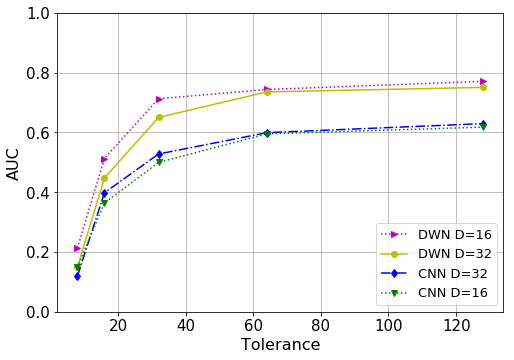

In [40]:
plt.figure(figsize=(8,5.5))
plt.plot(tolerance[:-2],tol_auc_RCNN16[:-2],'>:m',label ='DWN D=16')
plt.plot(tolerance[:-2],tol_auc_RCNN32[:-2],'-oy',label ='DWN D=32')
plt.plot(tolerance[:-2],tol_auc_CNN32[:-2],'d-.b',label ='CNN D=32')
plt.plot(tolerance[:-2],tol_auc_CNN16[:-2],':vg',label ='CNN D=16')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('Tolerance', fontsize = 16)
plt.ylabel('AUC', fontsize = 16)

# show the results
#plt.show()

#save the results
plt.savefig('../../plot/plt1.png', bbox_inches = 'tight')

In [13]:
1

1